# Weekly activity
1. Write a program to segment the boat and the people on it from the background. Follow the instruction below:
  - Use 'boat.jpg' as input.
  - Apply Otsu thresholding.
  - Draw bounding box to identify the region where the boat and people are located.
2. Write a program to visualize the effect of size of structuring element on the morphological transformation (e.g. erosion, dilation, opening, and closing).
  - Load the 'leaf.jfif' and perform thresholding to segment the leaf from the background.
  - Create a GUI containing trackbar to control the size of structuring element and display the resulting image on a window alongside the trackbar.
3. Apply the steps shown in exercise 4 to segment the porcelain from these images: "porcelain1.jfif" - "porcelain5.jfif".

In [1]:
import sys
assert sys.version_info > (3, 7)

import cv2 as cv
import numpy as np
from util_func import *

### Exercise 1

In [44]:
img = cv.imread("images/boat.jpg", 0)

_, mask = cv.threshold(img, 0, 255, cv.THRESH_OTSU + cv.THRESH_BINARY_INV)

contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    cv.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 1)
    
show_img("boat", img)

### Exercise 2

In [58]:
img = cv.imread("images/leaf.jfif", 0)

_, mask = cv.threshold(img, 0, 255, cv.THRESH_OTSU)

def trackbar(x):
    pass

wn = "window"
cv.namedWindow(wn)
cv.createTrackbar("width", wn, 3, 10, trackbar)
cv.createTrackbar("height", wn, 3, 10, trackbar)

while True:
    width = cv.getTrackbarPos("width", wn)
    if width < 3:
        width = 3
    
    height = cv.getTrackbarPos("height", wn)
    if height < 3:
        height = 3
        
    kernel = np.ones((height, width), dtype=np.uint8)
    res = cv.morphologyEx(mask, cv.MORPH_CLOSE, kernel)
    
    cv.imshow(wn, res)
    k = cv.waitKey(1)
    if k == 27:
        break
        
cv.destroyAllWindows()

### Exercise 3

In [14]:
def color_seg(img, color_low, color_high, smooth=True):
    """Args:
    img: Source image (RGB)
    color_low, color_high: HSV color tuples
    smooth: Boolean (default: True)"""
    original_img = img.copy()
    if smooth:
        img = cv.GaussianBlur(img, (5, 5), 0)
        
    img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    mask = cv.inRange(img_hsv, color_low, color_high)
    
    # morphological operations
    mask = cv.erode(mask, None, iterations=2)
    mask = cv.dilate(mask, None, iterations=2)
    
    return cv.bitwise_and(original_img, original_img, mask=mask)

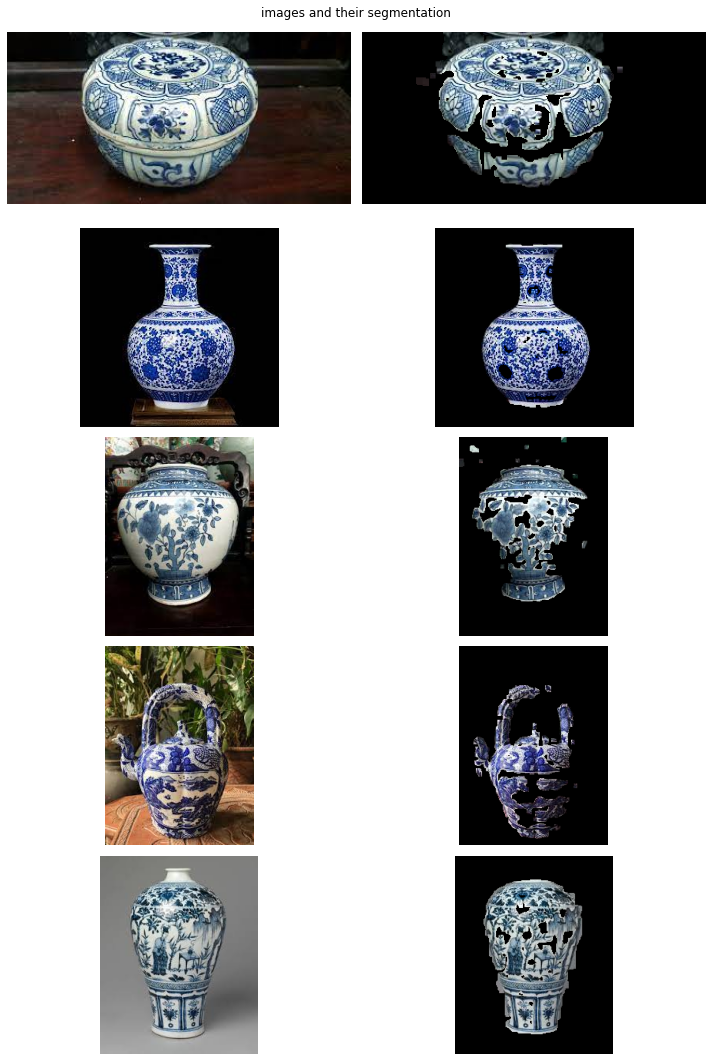

In [17]:
blue_low = (70, 5, 20)
blue_high = (180, 210, 255)

imgs = []
for i in range(1, 6):
    img = cv.imread(cv.samples.findFile(f"images/color_space/porcelain{i}.jfif"))
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    imgs.append(img)

res = [color_seg(img, blue_low, blue_high) for img in imgs]

fig, ax = plt.subplots(5, 2, figsize=(10, 15))

for i in range(5):
    ax[i][0].imshow(imgs[i])
    ax[i][0].axis("off")
    ax[i][1].imshow(res[i])
    ax[i][1].axis("off")
    
plt.suptitle("images and their segmentation")
plt.tight_layout()
plt.show()